# Analysis of Computer Game Sales

<b>Aim</b>

To identify patterns that determine the success of a game.

<b>Project stages</b>

1. Opening the data file and examining the general information
2. Data preprocessing
3. Exploratory data analysis:
- Analyze how many games were released in different years. Determine if data from all periods is relevant.
- Examine the sales trends across platforms. Choose platforms with the highest total sales and plot their distributions over the years. Evaluate the typical lifespan of platforms - when new ones emerge and old ones fade.
- Filter data for the relevant period. The primary criterion is data that can aid in predicting the 2017 sales forecast. Analyze which platforms lead in sales, and which ones are growing or declining. Choose several potentially profitable platforms.
- Create a box plot of global game sales broken down by platform. Describe the findings.
- Investigate the influence of user and critic reviews on sales within a popular platform. Plot a scatter diagram and compute the correlation between reviews and sales. Draw conclusions.
- Analyze the general distribution of games by genre. Describe the characteristics of the most profitable genres. Determine if there are genres with notably high or low sales.
4. For each region (NA, EU, JP), determine:
- The most popular platforms (top-5). Describe the variations in sales percentages.
- The most popular genres (top-5). Explain the differences.
- The impact of ESRB ratings on sales in a specific region.
5. Hypothesis testing:
- The average user ratings of the Xbox One and PC platforms are the same
- The average user ratings for the Action and Sports genres are different.
6. Overall conclusion.

<b>Data Description</b>

- Name — game title
- Platform — gaming platform
- Year_of_Release — year of release
- Genre — game genre
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — critics' rating (out of 100)
- User_Score — users' rating (out of 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## Opening the data file and examining general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Findings:</b>
1. Mismatched column types:
- User_Score should be of type float.
- Year_of_Release - int.
2. There are missing and zero values.

## Data Preprocessing

In [5]:
#retain the original database for potential future comparisons with the processed version

good_data = data

In [6]:
# convert column names to lowercase

good_data.columns = good_data.columns.str.lower()
good_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# transform data into the required types. 

good_data['year_of_release'] = good_data['year_of_release'].astype('Int64')

In [8]:
# it is essential to understand why the User_Score column is of type object.

good_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The abbreviation 'tbd' stands for "to be determined". This means that the game has not been rated yet for some reason. Essentially, this is equivalent to NaN. So, we can replace 'tbd' with NaN and subsequently change the data type of the column to float.

In [9]:
good_data['user_score'] = good_data['user_score'].replace('tbd', np.NaN)
good_data['user_score'] = good_data['user_score'].astype('float')

In [10]:
good_data.duplicated().sum()

0

In [11]:
good_data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
good_data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

No duplicates found in platforms or genres.

In [13]:
good_data['year_of_release'].isnull().sum()

269

In [14]:
# Our initial analysis revealed that the same games appeared in multiple rows, but released on different platforms.
# There might be cases where a game on one platform has a release date, but it's missing for another platform. 
# Hence, we can attempt to fill in the missing values based on the known release dates.

for g in good_data[good_data['year_of_release'].isnull() == True].index:  
    good_data['year_of_release'][g] = good_data.loc[good_data['name'] == good_data['name'][g], 'year_of_release'].max()

In [15]:
good_data['year_of_release'].isnull().sum()
# Indeed, more than 100 missing values were filled this way.

146

In [16]:
# in two cases, the game name is unknown, and in another two, the genre is unknown. We will exclude these from our analysis.

good_data = good_data.dropna(subset=['name', 'genre']).reset_index(drop=True)

In [17]:
# record the total sales across all regions in a separate column
good_data['total_sales'] = good_data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [18]:
good_data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


It doesn't make sense to fill in the other missing values, and removing them might result in a significant data shift. Hence, we decided to leave the rest of the data unchanged.

In [19]:
good_data['rating'] = good_data['rating'].fillna('unknown')

<b>Conclusions:</b>
- The data type of the year_of_release column has been changed to int since it's a whole number.

- The data type of the user_score column was converted to float to facilitate further computations after replacing 'tbd' with NaN.

- Missing values in the year_of_release column were filled based on the known game release dates.

- Rows with games having unknown names and genres were removed.

- We decided not to fill or remove the other missing values. The missing values themselves don't hinder the analysis, but deleting a significant portion of the data might skew our results.

- Added a total_sales column that captures the cumulative sales across all regions.

The missing values might have originated due to a lack of information on the website or errors during data extraction.

## Exploratory Data Analysis

### Analyze how many games were released in different years. Assess whether the data for all periods are important.

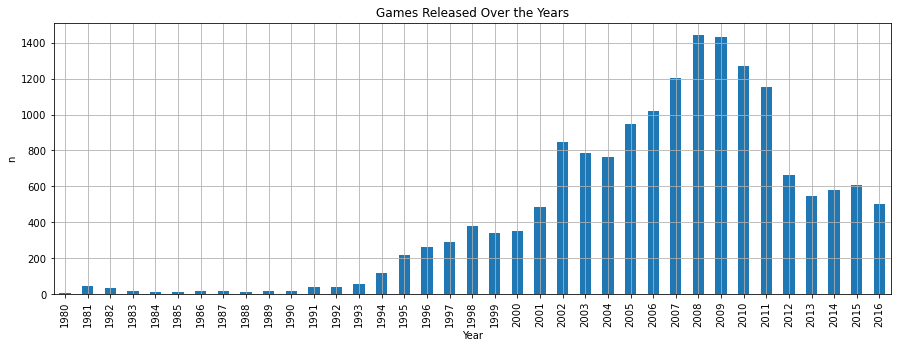

In [20]:
year_of_release_fig = good_data.groupby(['year_of_release'])['name'].count() \
.plot(kind='bar', grid=True, figsize=(15, 5))
year_of_release_fig.set_title('Games Released Over the Years')
year_of_release_fig.set_xlabel('Year')
year_of_release_fig.set_ylabel('n')
plt.show()    

Up to 1995, less than 200 games were released annually, which may not be statistically significant. There was a sharp increase in game production from 2002, peaking in 2008 and 2009. From 2012 onwards, there was a nearly twofold decline in the number of releases.

### Analyze how sales have changed across platforms. Choose platforms with the highest total sales and construct a distribution by year. Evaluate over what typical duration new platforms emerge and old ones disappear.

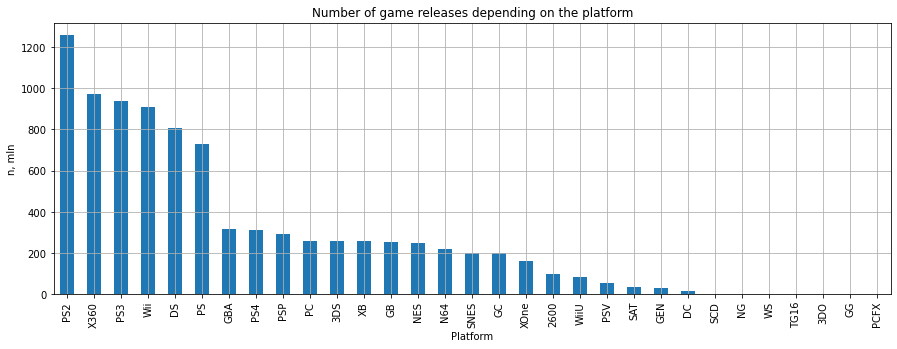

In [21]:
platforms_fig = good_data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False) \
.plot(kind='bar',style='o', grid=True, figsize=(15, 5))
platforms_fig.set_title('Number of game releases depending on the platform')
platforms_fig.set_xlabel('Platform')
platforms_fig.set_ylabel('n, mln')
plt.show()    

The highest sales are shown by games on 6 platforms: PS2, X360, PS3, Wii, DS, PS.

In [22]:
top_platforms = good_data.query('platform == "PS2" | platform == "X360" | platform == "PS3" \
| platform == "Wii" | platform == "DS" | platform == "PS"')
top_platforms_pivot = top_platforms.pivot_table('total_sales', ['platform', 'year_of_release'], aggfunc=sum)
pd.set_option('display.max_rows', None)
top_platforms_pivot

total_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  147.23
         2008                  145.36
         2009                  119.56
         2010                   85.35
         2011                   26.33
         2012                   11.67
         2013                    1.54
PS       1994                    6.03
         1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07
PS2      2000                   39.17
         2001                  166.43
         2002                  208.36
         2003                  193.05
         2004                  211.81
         2005                  160.66
         2006                  104.24
         2007                   76.10
         2008                   53.90
         2009                   26.40
         2010                    6.59
         2011                    0.45
PS3      2005                    0.19
         2006                   21.44
         2007                   73.19
         2008                  118.79
         2009                  130.93
         2010                  142.96
         2011                  157.98
         2012                  108.28
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
Wii      2006                  140.19
         2007                  153.41
         2008                  177.68
         2009                  206.97
         2010                  128.67
         2011                   59.79
         2012                   22.94
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
X360     2005                    9.22
         2006                   51.79
         2007                   95.41
         2008                  136.07
         2009                  120.82
         2010                  170.55
         2011                  145.23
         2012                  100.72
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

For the Nintendo DS platform, we see a strange year - 1985, even though the platform was released in 2004. This is likely a data error.

In [23]:
top_platforms = top_platforms[top_platforms['year_of_release'] > 1985]
# we remove 1985, since other top platforms do not have releases earlier than this year.
life_of_platforms = top_platforms.groupby('platform').agg({'year_of_release' : 'max'}) \
-  top_platforms.groupby('platform').agg({'year_of_release' : 'min'}) 
life_of_platforms

,year_of_release
platform,
DS,9
PS,9
PS2,11
PS3,11
Wii,10
X360,11


Overall, from the tables, we see that the "lifespan" of a gaming platform is about 10 years.

### Select data for the corresponding relevant period. The main selection factor is that the data can help build a forecast for 2017. Analyze which platforms are leading in sales, rising or falling. Choose several potentially profitable platforms.

Considering that, in general, the most "popular" platforms last about 10 years, and also that forecasts for 2017 should be based on fresh data, it makes sense to take the period from 2006 to 2015. However, given that the gaming industry is evolving very quickly, the interval should be narrowed down to 4 years. 2016 should not be included, as according to the task's conditions, it is currently December 2016 and the data for the current year may be incomplete and, consequently, incorrectly analyzed.

In [24]:
good_data_actual = good_data[(good_data['year_of_release'] >= 2012) & (good_data['year_of_release'] <= 2015)]

In [25]:
good_data_actual.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)

platform
PS3     286.11
PS4     244.89
X360    236.00
3DS     179.87
XOne    133.17
WiiU     77.59
PC       58.26
PSV      44.93
Wii      36.42
DS       13.21
PSP      11.69
Name: total_sales, dtype: float64

In [26]:
platforms_actual = ['PSP', 'DS', 'Wii', 'PSV', 'PC', 'WiiU', 'XOne', '3DS', 'X360', 'PS4', 'PS3']

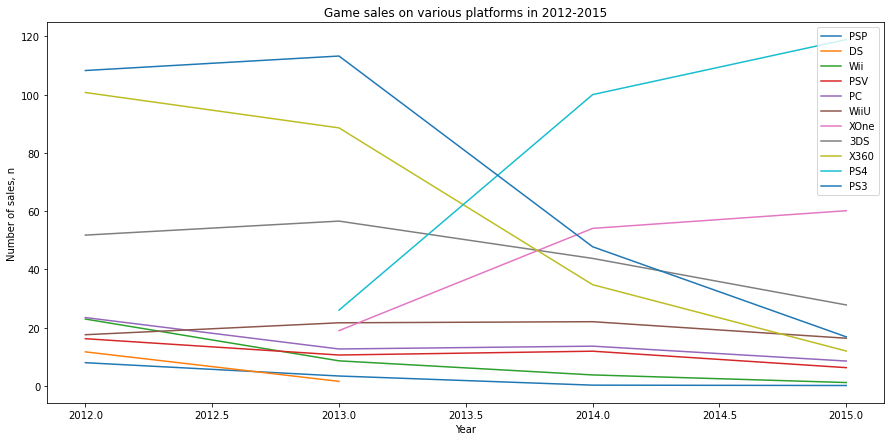

In [27]:
good_data_actual_plat = good_data_actual.query('platform == @platforms_actual') \
.pivot_table('total_sales', ['platform', 'year_of_release'], aggfunc=sum).reset_index()

ax = plt.gca();
for x in platforms_actual:
    plat = good_data_actual_plat.query('platform == @x');
    plat.plot(x = 'year_of_release', y = 'total_sales', figsize=(15, 7), ax=ax);
ax.legend(platforms_actual);
ax.set_title('Game sales on various platforms in 2012-2015')
ax.set_xlabel('Year')
ax.set_ylabel('Number of sales, n')
plt.show()

Overall, on the chart, we see a trend of declining game sales. Sales on PC show a stable level. It is also evident that starting from 2013, active sales growth began on the PS4 and XOne platforms. Accordingly, these platforms are currently the most promising, especially considering the fact that the peak in game sales occurs 3-5 years from the beginning of the platform's "life".

### Construct a "box and whiskers" plot for global game sales broken down by platform. Describe the result.

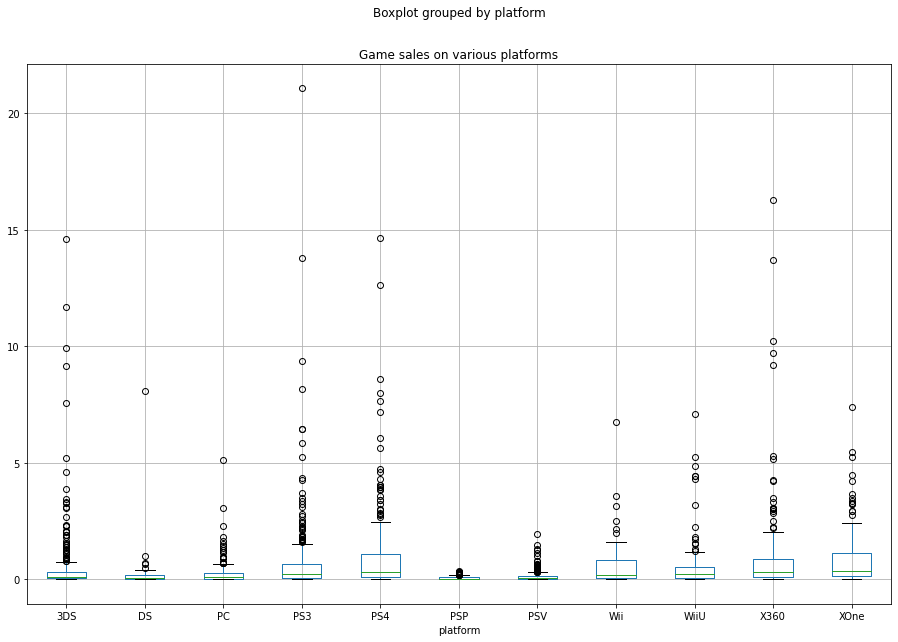

In [28]:
good_data_actual.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title('Game sales on various platforms')
plt.show()

In [29]:
for plat in good_data_actual['platform'].unique():
    descr = good_data_actual.query('platform == @plat')
    print('Platform', plat)
    print(descr['total_sales'].describe())
    print('')

Platform PS3
count    456.000000
mean       0.627434
std        1.513655
min        0.010000
25%        0.050000
50%        0.230000
75%        0.660000
max       21.050000
Name: total_sales, dtype: float64

Platform X360
count    281.000000
mean       0.839858
std        1.739239
min        0.010000
25%        0.100000
50%        0.340000
75%        0.890000
max       16.270000
Name: total_sales, dtype: float64

Platform PS4
count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: total_sales, dtype: float64

Platform 3DS
count    351.000000
mean       0.512450
std        1.422558
min        0.010000
25%        0.050000
50%        0.120000
75%        0.340000
max       14.600000
Name: total_sales, dtype: float64

Platform DS
count    32.000000
mean      0.412812
std       1.416559
min       0.010000
25%       0.020000
50%       0.050000
75%       0.195000
max       8.060000
Nam

Since the chart contains significant outliers, we "narrow" the y-axis.

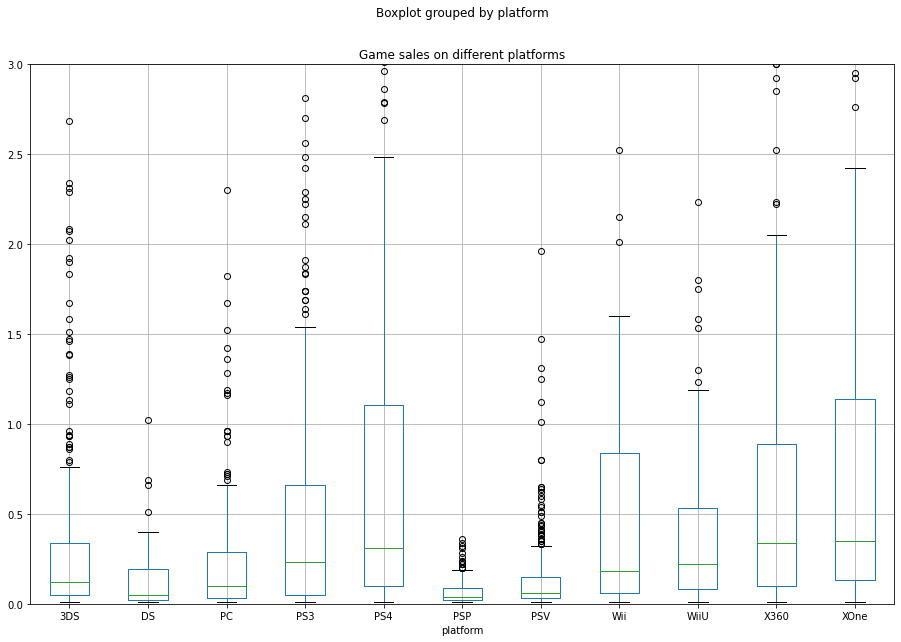

In [30]:
good_data_actual.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title('Game sales on different platforms')
plt.ylim(0, 3)
plt.show()

The median sales of games on the most well-known platforms are 0.2-0.25 million copies, and for two platforms (PS4 and XOne) the upper limit reaches almost 2.5 million copies. PC has a relatively low median of sales. Meanwhile, 228 and 160 games were released on PS4 and XOne, respectively, and on PC - 733 games. This suggests that PS4 and XOne release more quality and sellable games, albeit in smaller quantities.

### Analyze how user and critic reviews affect sales within one popular platform. Construct a scatter plot and calculate the correlation between reviews and sales. Formulate conclusions. Compare with other platforms.

In [31]:
good_data_actual_X360 = good_data_actual[(good_data_actual['platform'] == 'X360')]

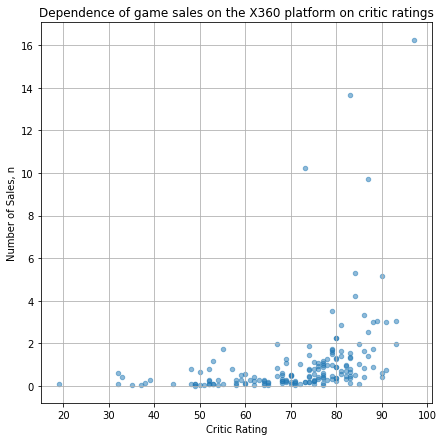

In [32]:
good_data_actual_X360_crit = good_data_actual_X360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(7,7), grid=True)
good_data_actual_X360_crit.set_title('Dependence of game sales on the X360 platform on critic ratings')
good_data_actual_X360_crit.set_xlabel('Critic Rating')
good_data_actual_X360_crit.set_ylabel('Number of Sales, n')
plt.show()

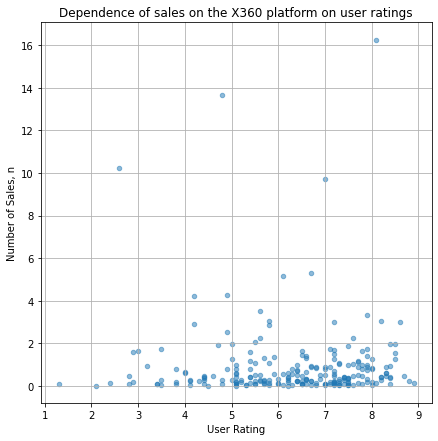

In [33]:
good_data_actual_X360_user = good_data_actual_X360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(7,7), grid=True)
good_data_actual_X360_user.set_title('Dependence of sales on the X360 platform on user ratings')
good_data_actual_X360_user.set_xlabel('User Rating')
good_data_actual_X360_user.set_ylabel('Number of Sales, n')
plt.show()

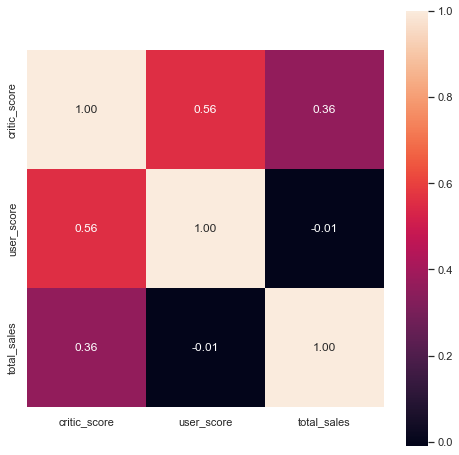

In [34]:
corr_good_data_actual_X360 = good_data_actual_X360[['platform', 'critic_score', 'user_score', 'total_sales']].corr()
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corr_good_data_actual_X360, square=True, annot=True, fmt='.2f')
sns.color_palette("Paired")
plt.show()

By building a correlation matrix with correlation coefficients, we see that user ratings do not correlate with sales (correlation coefficient -0.01, indicating a lack of correlation). Critic ratings positively correlate with sales - a correlation coefficient of 0.36, but its strength is weak. We can say that users trust expert opinions more.

In [35]:
crit_user_ratings_all = good_data_actual.loc[:,['platform', 'total_sales', 'critic_score', 'user_score']]

In [36]:
# initially, let's analyze correlations across all platforms.

crit_user_ratings_all.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.319619,0.010353
critic_score,0.319619,1.000000,0.534601
user_score,0.010353,0.534601,1.000000


If we sample all platforms present in the market during the analyzed period, we can conclude that user ratings do not influence sales, while critic ratings weakly positively correlate with sales.

In [37]:
# analyze correlations for each platform separately

for p in range(0, 11):
    crit_user_ratings_all_plat = good_data_actual.query('platform == @platforms_actual[@p]')
    print(platforms_actual[p])
    display(crit_user_ratings_all_plat[['platform', 'total_sales', 'critic_score', 'user_score']].corr())

PSP


,total_sales,critic_score,user_score
total_sales,1.000000,NaN,-0.802302
critic_score,NaN,NaN,NaN
user_score,-0.802302,NaN,1.000000


DS


,total_sales,critic_score,user_score
total_sales,1.000000,1.0,0.882709
critic_score,1.000000,1.0,NaN
user_score,0.882709,NaN,1.000000


Wii


,total_sales,critic_score,user_score
total_sales,1.000000,-0.405997,0.277542
critic_score,-0.405997,1.000000,0.780222
user_score,0.277542,0.780222,1.000000


PSV


,total_sales,critic_score,user_score
total_sales,1.000000,0.116121,0.013595
critic_score,0.116121,1.000000,0.711630
user_score,0.013595,0.711630,1.000000


PC


,total_sales,critic_score,user_score
total_sales,1.000000,0.266735,-0.157726
critic_score,0.266735,1.000000,0.420337
user_score,-0.157726,0.420337,1.000000


WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.354691,0.413265
critic_score,0.354691,1.000000,0.760811
user_score,0.413265,0.760811,1.000000


XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.459385,-0.039268
critic_score,0.459385,1.000000,0.499502
user_score,-0.039268,0.499502,1.000000


3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.332658,0.211217
critic_score,0.332658,1.000000,0.722478
user_score,0.211217,0.722478,1.000000


X360


,total_sales,critic_score,user_score
total_sales,1.000000,0.360266,-0.009469
critic_score,0.360266,1.000000,0.557952
user_score,-0.009469,0.557952,1.000000


PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.431848,0.024231
critic_score,0.431848,1.000000,0.612451
user_score,0.024231,0.612451,1.000000


PS3


,total_sales,critic_score,user_score
total_sales,1.000000,0.331371,-0.021624
critic_score,0.331371,1.000000,0.539525
user_score,-0.021624,0.539525,1.000000


We see oddities for some platforms - either there are no correlation coefficient values at all or it's anomalously high. This can happen if there are too few values. Let's see how many values are missing in critic and user ratings for each platform.

In [38]:
for p in range(0, 11):
    crit_user_ratings_all_plat = good_data_actual.query('platform == @platforms_actual[@p]')
    print(platforms_actual[p])
    critic_score_miss = crit_user_ratings_all_plat.query('platform == @platforms_actual[@p]')['critic_score'].isna().sum()/\
len(crit_user_ratings_all_plat.query('platform == @platforms_actual[@p]')['critic_score'])
    user_score_miss = crit_user_ratings_all_plat.query('platform == @platforms_actual[@p]')['user_score'].isna().sum()/\
len(crit_user_ratings_all_plat.query('platform == @platforms_actual[@p]')['user_score'])
    print('Percentage of missing values in:\n"critic_score_miss" - {:.1%},\n"user_score_miss" --- {:.1%}'
      .format(critic_score_miss, user_score_miss))
    print('')

PSP
Percentage of missing values in:
"critic_score_miss" - 99.4%,
"user_score_miss" --- 97.7%

DS
Percentage of missing values in:
"critic_score_miss" - 93.8%,
"user_score_miss" --- 90.6%

Wii
Percentage of missing values in:
"critic_score_miss" - 88.9%,
"user_score_miss" --- 66.7%

PSV
Percentage of missing values in:
"critic_score_miss" - 70.2%,
"user_score_miss" --- 64.1%

PC
Percentage of missing values in:
"critic_score_miss" - 21.4%,
"user_score_miss" --- 17.4%

WiiU
Percentage of missing values in:
"critic_score_miss" - 39.1%,
"user_score_miss" --- 31.6%

XOne
Percentage of missing values in:
"critic_score_miss" - 31.9%,
"user_score_miss" --- 27.5%

3DS
Percentage of missing values in:
"critic_score_miss" - 72.9%,
"user_score_miss" --- 70.7%

X360
Percentage of missing values in:
"critic_score_miss" - 38.8%,
"user_score_miss" --- 18.5%

PS4
Percentage of missing values in:
"critic_score_miss" - 32.5%,
"user_score_miss" --- 31.6%

PS3
Percentage of missing values in:
"critic_scor

Indeed, for PSP, DS, Wii, PSV, 3DS, there are too many missing values, so we cannot draw conclusions from them.

Analyzing other platforms, we can say that in almost all cases, the situation is similar - users trust critic ratings more than user ratings. The exception is the WiiU platform, where users trust both ratings, and even a little more to user ratings. Also notable are PC users who have little trust in critics too - a correlation coefficient of 0.26 is very weak.

### Analyze the overall distribution of games by genre. Describe the characteristics of the most profitable genres. Assess whether genres with high and low sales stand out.

In [39]:
good_data_genre = good_data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median').reset_index()
good_data_genre.sort_values('total_sales', ascending=False)

,genre,total_sales
8,Shooter,0.505
10,Sports,0.305
4,Platform,0.285
6,Racing,0.230
3,Misc,0.180
2,Fighting,0.160
7,Role-Playing,0.150
9,Simulation,0.150
0,Action,0.140
11,Strategy,0.080


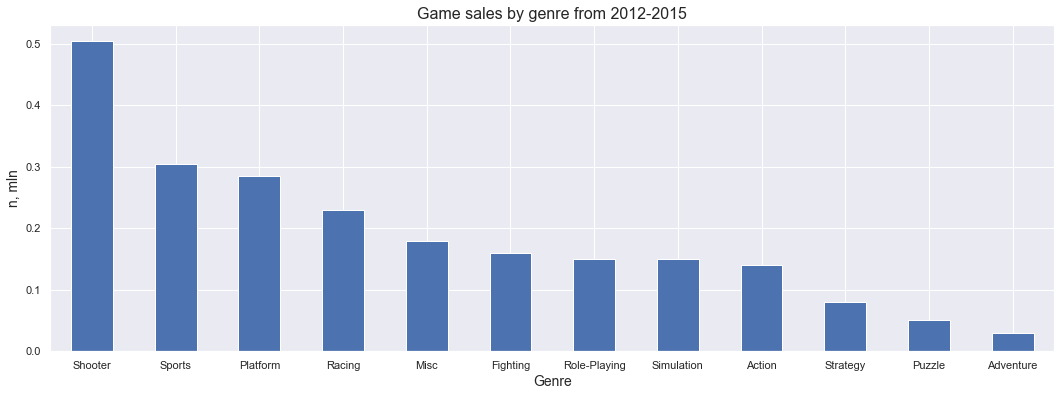

In [40]:
good_data_genre_fig=good_data_genre.sort_values(by='total_sales', ascending=False) \
.plot(x='genre', y='total_sales', kind='bar', figsize=(18, 6), rot=360)
good_data_genre_fig.get_legend().remove()
plt.title('Game sales by genre from 2012-2015', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('n, mln', size=14)
plt.show()

The best-selling genres over the past 4 years are shooters, sports games, and platformers; the least selling ones are "calm" games - strategies, puzzles, adventures.

## User profile for each region

### Most popular platforms (top-5). Describe differences in sales percentages.

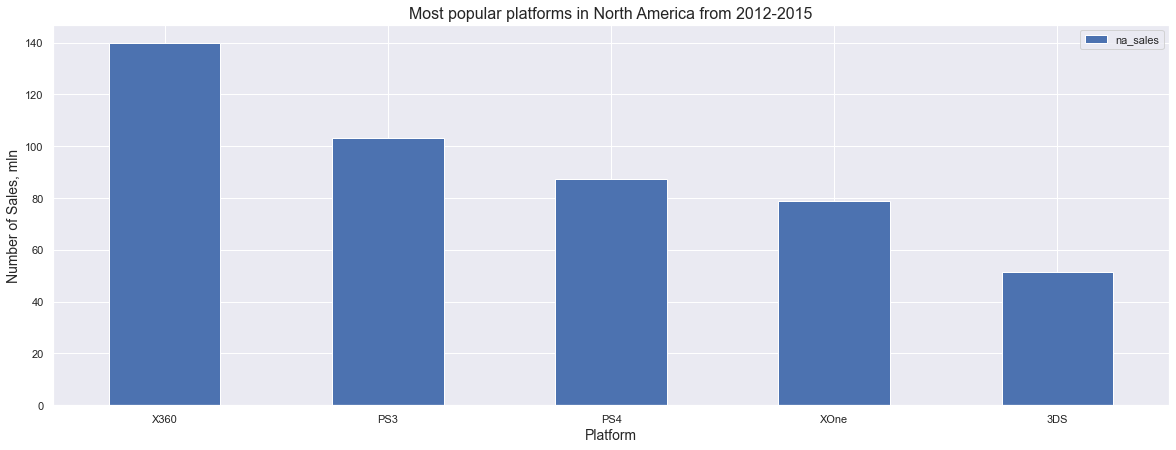

In [41]:
america_platform = good_data_actual.pivot_table(index='platform', values='na_sales', \
                                                aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()\
.head(5).plot(x='platform', y='na_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Most popular platforms in North America from 2012-2015', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Number of Sales, mln', size=14)
plt.show()

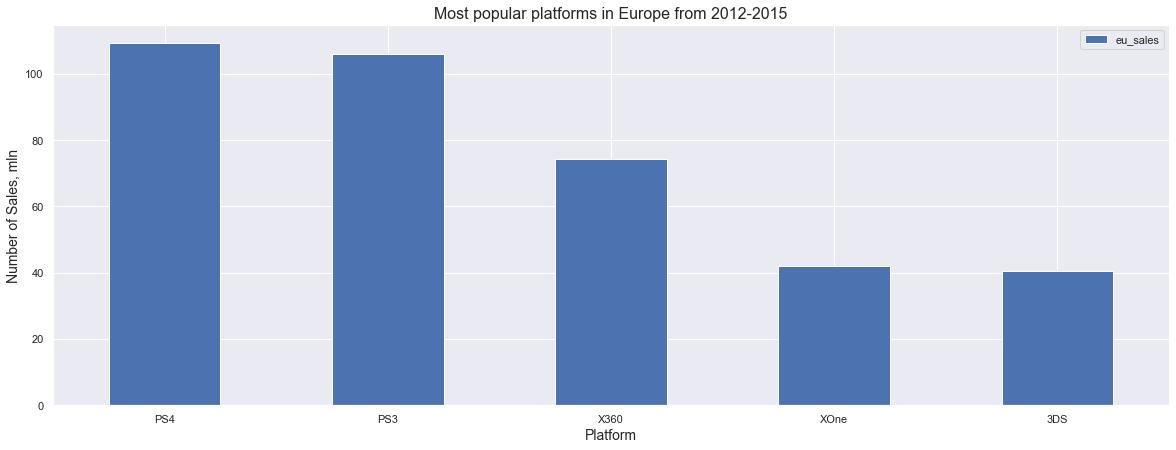

In [42]:
europe_platform = good_data_actual.pivot_table(index='platform', values='eu_sales', \
                                                aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()\
.head(5).plot(x='platform', y='eu_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Most popular platforms in Europe from 2012-2015', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Number of Sales, mln', size=14)
plt.show()

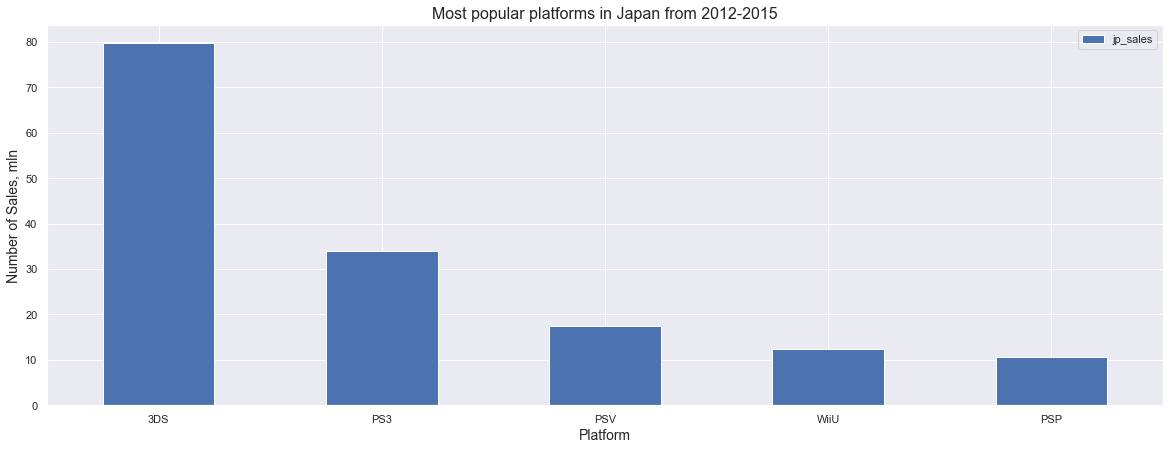

In [43]:
japan_platform = good_data_actual.pivot_table(index='platform', values='jp_sales', \
                                                aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()\
.head(5).plot(x='platform', y='jp_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Most popular platforms in Japan from 2012-2015', size=16)
plt.xlabel('Platform', size=14)
plt.ylabel('Number of Sales, mln', size=14)
plt.show()

In Japan, unlike North America and Europe, where the PS and Xbox are the most popular, the locally produced platform, 3DS, leads.

### Most popular genres (top-5). Explain the difference.

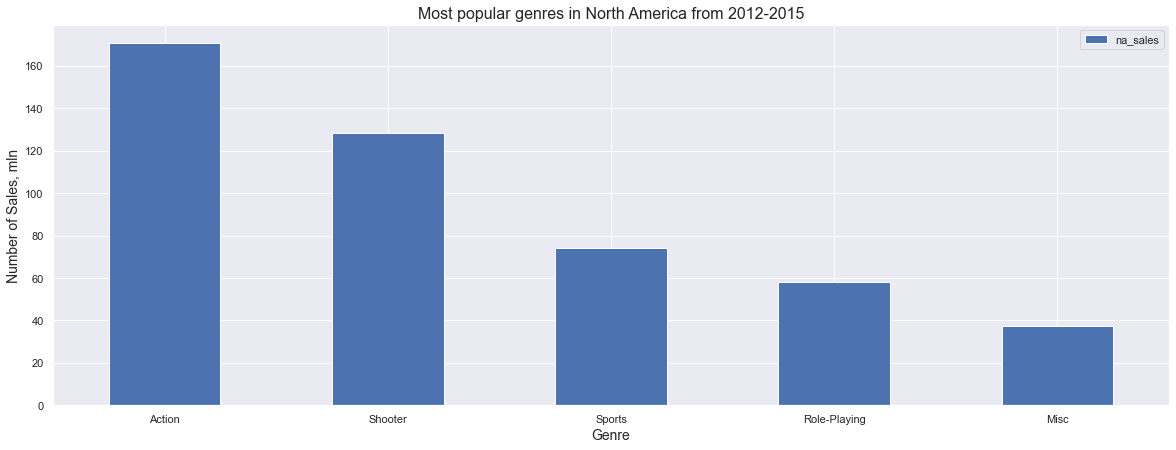

In [44]:
america_genre = good_data_actual.pivot_table(index='genre', values='na_sales', \
                                                aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()\
.head(5).plot(x='genre', y='na_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Most popular genres in North America from 2012-2015', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('Number of Sales, mln', size=14)
plt.show()

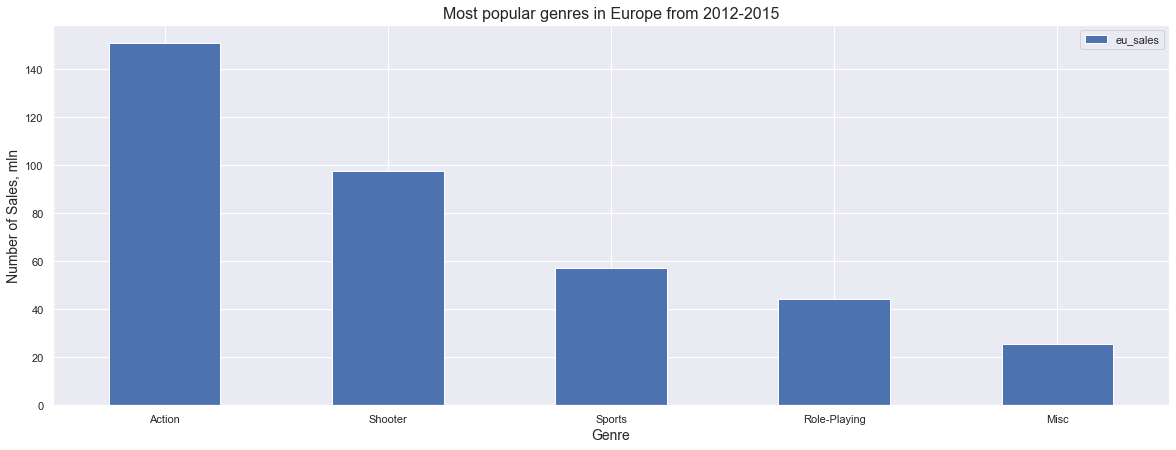

In [45]:
europe_genre = good_data_actual.pivot_table(index='genre', values='eu_sales', \
                                                aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()\
.head(5).plot(x='genre', y='eu_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Most popular genres in Europe from 2012-2015', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('Number of Sales, mln', size=14)
plt.show()

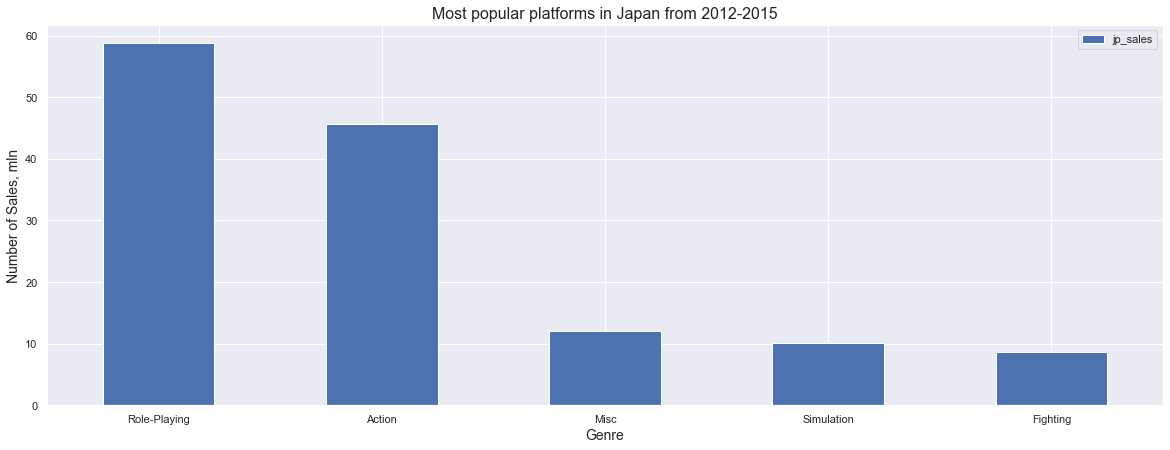

In [46]:
japan_genre = good_data_actual.pivot_table(index='genre', values='jp_sales', \
                                                aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()\
.head(5).plot(x='genre', y='jp_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Most popular platforms in Japan from 2012-2015', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('Number of Sales, mln', size=14)
plt.show()

In this case, Japan significantly differs from America and Europe - the most popular genre is Role-Playing, followed by a large margin by other genres.

### Does the ESRB rating influence sales in a particular region?

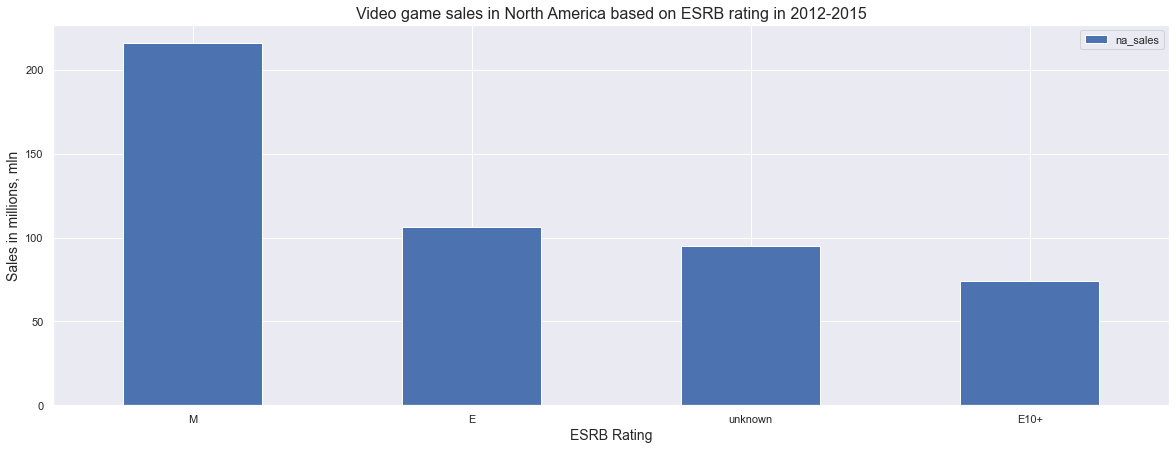

In [47]:
america_rating = good_data_actual.pivot_table(index='rating', values='na_sales', \
                                                aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()\
.head(4).plot(x='rating', y='na_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Video game sales in North America based on ESRB rating in 2012-2015', size=16)
plt.xlabel('ESRB Rating', size=14)
plt.ylabel('Sales in millions, mln', size=14)
plt.show()

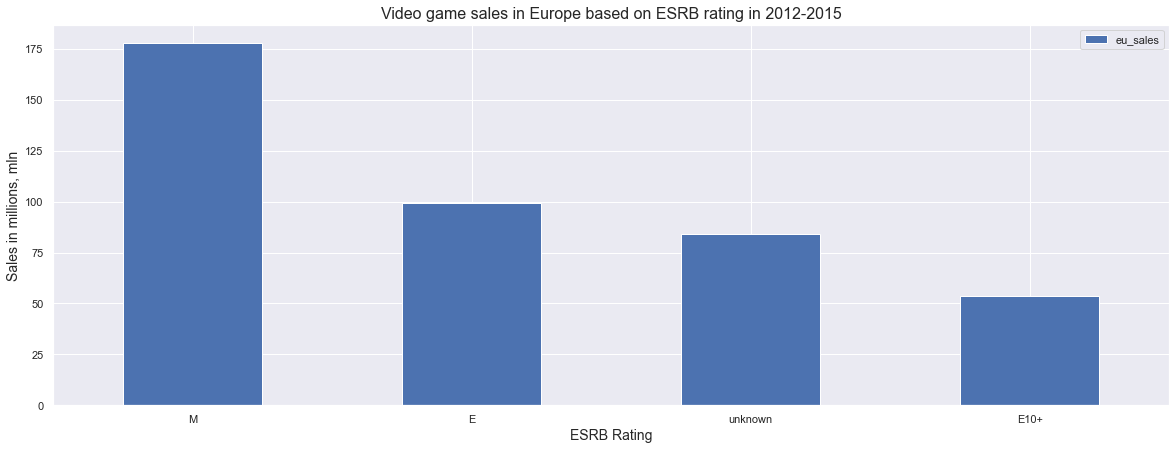

In [48]:
europe_rating = good_data_actual.pivot_table(index='rating', values='eu_sales', \
                                                aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()\
.head(4).plot(x='rating', y='eu_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Video game sales in Europe based on ESRB rating in 2012-2015', size=16)
plt.xlabel('ESRB Rating', size=14)
plt.ylabel('Sales in millions, mln', size=14)
plt.show()

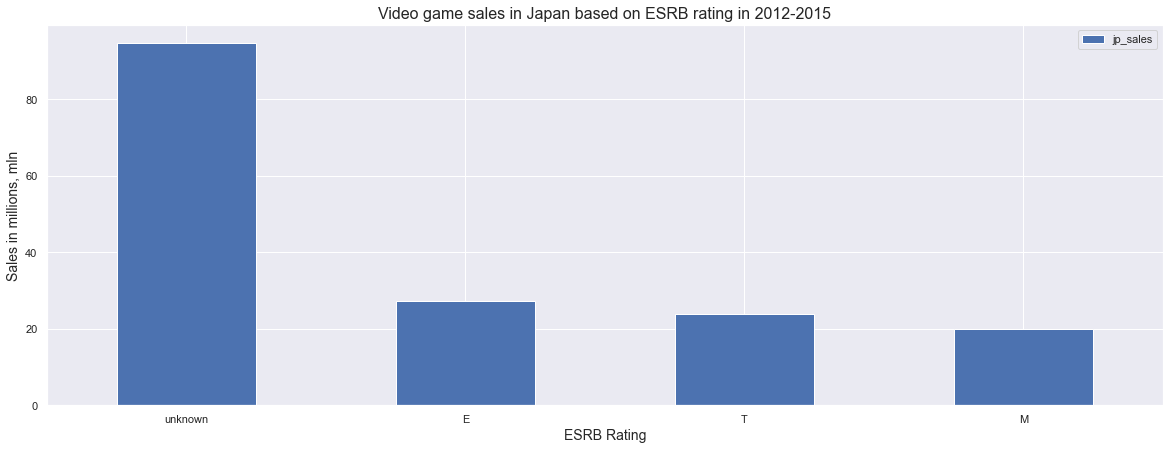

In [49]:
japan_rating = good_data_actual.pivot_table(index='rating', values='jp_sales', \
                                                aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()\
.head(4).plot(x='rating', y='jp_sales', kind='bar', figsize=(20, 7), rot=360)
plt.title('Video game sales in Japan based on ESRB rating in 2012-2015', size=16)
plt.xlabel('ESRB Rating', size=14)
plt.ylabel('Sales in millions, mln', size=14)
plt.show()

The most popular games in Europe and America are for users over 17 years old. In contrast to America and Europe, Japan is dominated by games that have not received an ESRB rating. According to Wikipedia, "The Entertainment Software Rating Board (ESRB) is a self-regulatory organization that assigns age and content ratings to consumer video games in the United States and Canada." Likely, developers in Japan are not very interested in rating games intended for the domestic market and do not apply for assessment.

Thus, American and European users are generally similar to each other - they are predominantly users over 17 years old who love to play on PlayStation and Xbox in shooters and action games. The Japanese user is fundamentally different - he predominantly plays on domestic production platforms in role-playing games. Probably, different mentalities (habits) of users in Western and Eastern cultures matter.

## Hypothesis Testing

### Hypothesis 1: Average user ratings for the Xbox One and PC platforms are the same

H0 - null hypothesis - average user ratings for Xbox One and PC platforms are the same.

H1 - alternative hypothesis - average user ratings for Xbox One and PC platforms differ.

In [50]:
# compare the current data, because if we take ratings for the entire existence of the PC, the comparison will not be entirely correct.
good_data_actual_xbox = good_data_actual[good_data_actual['platform'] == 'XOne']\
.dropna(subset=['user_score']).reset_index(drop=True)
good_data_actual_pc = good_data_actual[good_data_actual['platform'] == 'PC']\
.dropna(subset=['user_score']).reset_index(drop=True)
good_data_actual_xbox_score = good_data_actual_xbox['user_score']
good_data_actual_pc_score = good_data_actual_pc['user_score']

alpha = .05
results = st.ttest_ind(good_data_actual_xbox_score, good_data_actual_pc_score)  
# we will use the criterion for testing two independent samples.
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")
print('')
print('Average user rating for Xbox One games  - {:.2f}'.format(good_data_actual_xbox_score.mean()))
print('Average user rating for PC games - {:.2f}'.format(good_data_actual_pc_score.mean()))

p-value: 0.9651627878021862
Failed to reject the null hypothesis

Average user rating for Xbox One games  - 6.48
Average user rating for PC games - 6.49


Thus, user ratings for Xbox One and PC games do not statistically differ.

### Hypothesis 2: Average user ratings for the Action and Sports genres are different.

H0 - null hypothesis - average user ratings for the Action and Sports genres are the same.

H1 - alternative hypothesis - average user ratings for the Action and Sports genres differ.

In [51]:
#here we can already take the whole dataset because games were released at all times
good_data_actual_action = good_data_actual[good_data_actual['genre'] == 'Action']\
.dropna(subset=['user_score']).reset_index(drop=True)
good_data_actual_sports = good_data_actual[good_data_actual['genre'] == 'Sports']\
.dropna(subset=['user_score']).reset_index(drop=True)
good_data_actual_action_score = good_data_actual_action['user_score']
good_data_actual_sports_score = good_data_actual_sports['user_score']

alpha = .05
results = st.ttest_ind(good_data_actual_action_score, good_data_actual_sports_score) 
#we will use the criterion for testing two independent samples
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")
    
print('')
print('Average user rating for Action genre  - {:.2f}'.format(good_data_actual_action_score.mean()))
print('Average user rating for Sports genre - {:.2f}'.format(good_data_actual_sports_score.mean()))

p-value: 4.194930739004733e-24
Reject the null hypothesis

Average user rating for Action genre  - 6.87
Average user rating for Sports genre - 5.46


Thus, user ratings for action games and sports games are statistically significantly different. Users prefer action games.

## General Conclusion

The implementation of this project aims to identify patterns that indicate the success of a game.

The following can be highlighted:
- Critic reviews have a larger impact on the sales of a game. 
- The highest sales are for games on the PS4 and XOne platforms.
- Developing games for the XOne and PS4 platforms is the most profitable worldwide.
- Action games, shooters, and sports games are the best-selling genres. If planning to enter the Japanese market, consider role-playing games - the most popular genre in Japan.
- For North America and Europe over the past 4 years, the best-selling games have been action games and shooters on the PS3 and X360 platforms, rated M by ESRB.
- For Japan, Role-Playing genre games on the native 3DS platform are the most popular.
- Users rate games on Xbox One and PC similarly.
- Users rate action games higher than sports genre games.